In [1]:
import sys
sys.path.append("./../")
import matplotlib.pyplot as plt
from sklearn.datasets import make_spd_matrix
import numpy as np
import zeus
import emcee

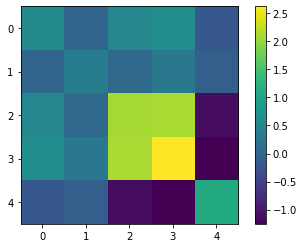

In [2]:
ndim = 5
nwalkers = 2*ndim
nsteps= 1000

# C = np.identity(ndim)
C = make_spd_matrix(ndim)
plt.imshow(C)
plt.colorbar()

icov = np.linalg.inv(C)

mu = np.random.rand(ndim) * 100.0

def logp(x, mu, icov):
    return -0.5 * np.dot(np.dot((x-mu).T,icov),(x-mu))

#start = np.random.rand(ndim)
p0 = np.random.rand(nwalkers,ndim)
start = p0 + 1e-3*np.random.randn(nwalkers, ndim)

In [6]:
sampler_zeus = zeus.sampler(logp, nwalkers, ndim, args=[mu, icov])
sampler_zeus.run(start, nsteps)

plt.figure(figsize=(16,1.5*ndim))
for n in range(ndim):
    plt.subplot2grid((ndim, 1), (n, 0))
    plt.plot(np.arange(np.shape(sampler_zeus.chain)[1]),sampler_zeus.chain[:,:,n].T,alpha=0.5)
    plt.axhline(y=mu[n])
plt.tight_layout()
plt.show()

trace_zeus = sampler_zeus.flatten()
plt.scatter(trace_zeus[:,0],trace_zeus[:,1], alpha=0.2)
plt.show()
print('MCMC mean:', np.mean(trace_zeus, axis=0))
print('TRUE mean:', mu)
print('MCMC std:', np.std(trace_zeus, axis=0))
print('TRUE std:', np.sqrt(np.diag(C)))


act_mean_minas = 0.0
for i in range(ndim):
    act_mean_minas += zeus.autocorrtime(trace_zeus[:,i]) 
act_mean_minas /= ndim
print('act:', act_mean_minas)
print('ESS:', nwalkers * nsteps / act_mean_minas)
print('ESS/LE:', (nwalkers * nsteps / act_mean_minas)/sampler_zeus.nlogp)

  0%|          | 0/1000 [00:00<?, ?it/s]

TypeError: logp() takes 1 positional argument but 3 were given

In [ ]:
nsteps *= 10

In [42]:
nwalkers = 20 * ndim
p0 = np.random.rand(nwalkers,ndim)
start = p0 + 1e-3*np.random.randn(nwalkers, ndim)

100%|██████████| 1000/1000 [00:00<00:00, 1247.97it/s]


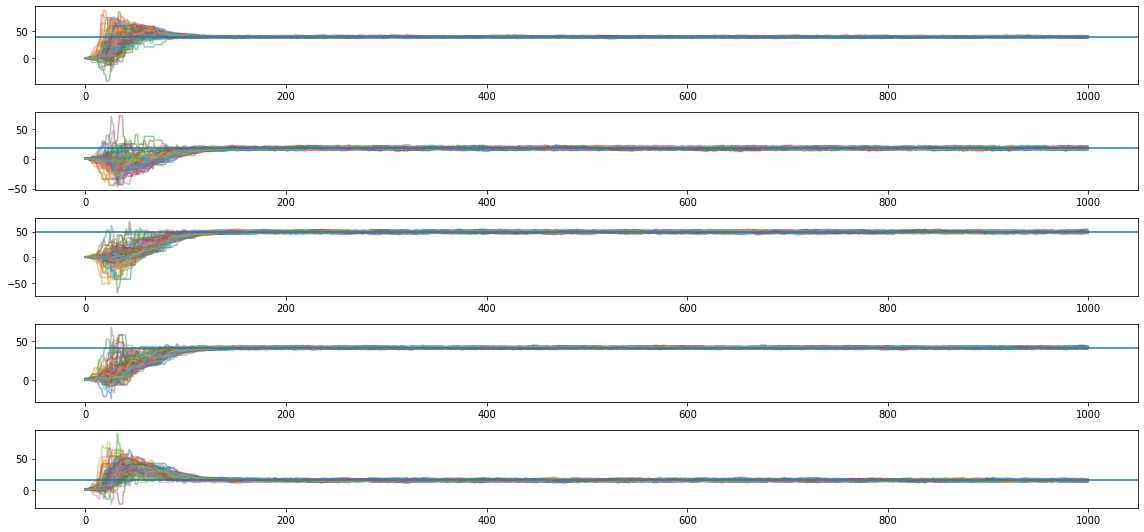

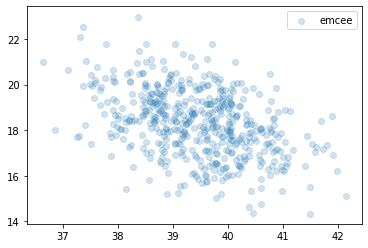

mean= [39.38948167 18.40476321 49.41034419 41.5778595  15.57931175]
TRUE mean: [39.3877142  18.38033971 49.36579315 41.53163615 15.61279823]
std= [0.95621294 1.49070749 1.516546   0.86347262 1.20152975]
TRUE std: [0.94495914 1.48680933 1.49407792 0.88578915 1.21749922]
act: 31.806268408442634
ESS: 3144.0343367490436
ESS/LE: 0.031440343367490436


In [43]:
sampler_emcee = emcee.EnsembleSampler(nwalkers, ndim, logp, args=[mu, icov])
sampler_emcee.run_mcmc(start, nsteps, progress=True)
    
plt.figure(figsize=(16,1.5*ndim))
for n in range(ndim):
    plt.subplot2grid((ndim, 1), (n, 0))
    plt.plot(np.arange(np.shape(sampler_emcee.chain)[1]),sampler_emcee.chain[:,:,n].T,alpha=0.5)
    plt.axhline(y=mu[n])
plt.tight_layout()
plt.show()

flatten_emcee = sampler_emcee.chain[:,int(nsteps/2):,:].reshape(-1,ndim)
plt.scatter(flatten_emcee[::100,0],flatten_emcee[::100,1], alpha=0.2, label='emcee')
plt.legend()
plt.show()

print('mean=', np.mean(flatten_emcee, axis=0))
print('TRUE mean:', mu)
print('std=', np.std(flatten_emcee, axis=0))
print('TRUE std:', np.sqrt(np.diag(C)))


act_mean_emcee = 0.0
for i in range(ndim):
    act_mean_emcee += zeus.autocorrtime(flatten_emcee[:,i]) 
act_mean_emcee /= ndim
print('act:', act_mean_emcee)
print('ESS:', nwalkers * nsteps / act_mean_emcee)
print('ESS/LE:', 1.0/ act_mean_emcee)